# InfluxDB 3 con Python

Este cuaderno muestra los **usos principales de InfluxDB 3** desde Python:
- Instalación de la librería `influxdb3-python`
- Conexión con InfluxDB 3
- Carga de datos
- Consultas SQL básicas
- Visualización de datos en gráficos

> **Requisitos previos**: tener una instancia de InfluxDB 3 (Cloud Serverless/Dedicated, Core o Enterprise) y un **token** con permisos de lectura/escritura.

## Pasos previos

In [ ]:
# Instalar dependencias (si es necesario)
!pip install influxdb3-python pandas matplotlib

## 1) Conexión: `InfluxDBClient3`

In [ ]:
# Configuración de la conexión a InfluxDB

# URL de la instancia de InfluxDB
HOST = "URL_DE_INFLUXDB"
# Organización (solo necesario en InfluxDB Cloud)
ORG = "NOMBRE_DE_LA_ORG"
# Base de datos (en InfluxDB Cloud se denomina bucket y es necesario crearlo antes)
DB = "NOMBRE_DEL_BUCKET/BASE_DE_DATOS"
# Contraseña de acceso
TOKEN = "TOKEN_DE_INFLUXDB"

In [93]:
from influxdb_client_3 import InfluxDBClient3

client = InfluxDBClient3(host=HOST, token=TOKEN, org=ORG, database=DB)

## 2) Cargar datos

### Line Protocol

In [70]:
data = """
player_stats,player=Vinicius,team=RealMadrid speed=31.7,heart_rate=150.0 1763337600000000000
player_stats,player=Pedri,team=Barcelona speed=30.2,heart_rate=142.0 1763337600000000000
player_stats,player=Vinicius,team=RealMadrid speed=32.5,heart_rate=152.0 1763337900000000000
player_stats,player=Pedri,team=Barcelona speed=29.8,heart_rate=144.0 1763337900000000000
player_stats,player=Vinicius,team=RealMadrid speed=33.1,heart_rate=155.0 1763338200000000000
player_stats,player=Pedri,team=Barcelona speed=30.0,heart_rate=147.0 1763338200000000000
player_stats,player=Vinicius,team=RealMadrid speed=31.9,heart_rate=149.0 1763338500000000000
player_stats,player=Pedri,team=Barcelona speed=29.4,heart_rate=140.0 1763338500000000000
player_stats,player=Vinicius,team=RealMadrid speed=34.0,heart_rate=158.0 1763338800000000000
player_stats,player=Pedri,team=Barcelona speed=30.5,heart_rate=145.0 1763338800000000000
player_stats,player=Vinicius,team=RealMadrid speed=33.6,heart_rate=153.0 1763339100000000000
player_stats,player=Pedri,team=Barcelona speed=30.7,heart_rate=148.0 1763339100000000000
"""

client.write(record=data.strip())

### Diccionarios de Python

In [16]:
records = [
	{
		"measurement": "player_stats",
		"tags": {"player": "Bellingham", "team": "RealMadrid"},
		"fields": {"speed": 29.8, "heart_rate": 143.0},
		"time": 1763337600000000000
	},
    {
		"measurement": "player_stats",
		"tags": {"player": "Bellingham", "team": "RealMadrid"},
		"fields": {"speed": 30.1, "heart_rate": 146.0},
		"time": 1763337900000000000
	},
    {
		"measurement": "player_stats",
		"tags": {"player": "Bellingham", "team": "RealMadrid"},
		"fields": {"speed": 30.4, "heart_rate": 148.0},
		"time": 1763338200000000000
	},
    {
		"measurement": "player_stats",
		"tags": {"player": "Bellingham", "team": "RealMadrid"},
		"fields": {"speed": 31.0, "heart_rate": 150.0},
		"time": 1763338500000000000
	},
    {
		"measurement": "player_stats",
		"tags": {"player": "Bellingham", "team": "RealMadrid"},
		"fields": {"speed": 30.7, "heart_rate": 149.0},
		"time": 1763338800000000000
	},
    {
		"measurement": "player_stats",
		"tags": {"player": "Bellingham", "team": "RealMadrid"},
		"fields": {"speed": 31.2, "heart_rate": 151.0},
		"time": 1763339100000000000
	},
]

client.write(record=records)

### DataFrames de Pandas

In [20]:
import pandas as pd

df = pd.DataFrame([
	{"player": "Lewandowski", "team": "Barcelona", "speed": 28.9, "heart_rate": 141.0, "time": 1763337600000000000},
    {"player": "Lewandowski", "team": "Barcelona", "speed": 29.3, "heart_rate": 144.0, "time": 1763337900000000000},
    {"player": "Lewandowski", "team": "Barcelona", "speed": 29.7, "heart_rate": 146.0, "time": 1763338200000000000},
    {"player": "Lewandowski", "team": "Barcelona", "speed": 30.0, "heart_rate": 148.0, "time": 1763338500000000000},
    {"player": "Lewandowski", "team": "Barcelona", "speed": 30.4, "heart_rate": 150.0, "time": 1763338800000000000},
    {"player": "Lewandowski", "team": "Barcelona", "speed": 30.1, "heart_rate": 147.0, "time": 1763339100000000000},
])

client.write(
	record=df,
	data_frame_measurement_name="player_stats",
	data_frame_tag_columns=["player", "team"],
	data_frame_timestamp_column="time"
)

### Objetos Point

In [31]:
from influxdb_client_3 import Point

points = [
	Point("player_stats")
		.time(1763337600000000000)
		.tag("player", "Rodrigo")
		.tag("team", "RealMadrid")
		.field("speed", 32.1)
		.field("heart_rate", 149.0),
    Point("player_stats")
		.time(1763337900000000000)
		.tag("player", "Rodrigo")
		.tag("team", "RealMadrid")
		.field("speed", 32.8)
		.field("heart_rate", 152.0),
    Point("player_stats")
		.time(1763338200000000000)
		.tag("player", "Rodrigo")
		.tag("team", "RealMadrid")
		.field("speed", 33.0)
		.field("heart_rate", 155.0),
    Point("player_stats")
		.time(1763338500000000000)
		.tag("player", "Rodrigo")
		.tag("team", "RealMadrid")
		.field("speed", 32.5)
		.field("heart_rate", 150.0),
    Point("player_stats")
		.time(1763338800000000000)
		.tag("player", "Rodrigo")
		.tag("team", "RealMadrid")
		.field("speed", 33.4)
		.field("heart_rate", 156.0),
    Point("player_stats")
		.time(1763339100000000000)
		.tag("player", "Rodrigo")
		.tag("team", "RealMadrid")
		.field("speed", 32.9)
		.field("heart_rate", 153.0),    
]

client.write(record=points)

### Fichero CSV

In [45]:
client.write_file(file="data/football_telemetry.csv", tag_columns=["player", "team"],data_format="csv")

## 3) Consultas

### 🔍 Selección y filtrado

In [ ]:
# Obtener los primeros 10 registros de la tabla 'player_stats'
query = """
SELECT *
FROM player_stats
LIMIT 10
"""
table = client.query(query=query)
df = table.to_pandas()
display(df)

,heart_rate,player,speed,team,time
0,143.0,Bellingham,29.8,RealMadrid,2025-11-17 00:00:00
1,146.0,Bellingham,30.1,RealMadrid,2025-11-17 00:05:00
2,148.0,Bellingham,30.4,RealMadrid,2025-11-17 00:10:00
3,150.0,Bellingham,31.0,RealMadrid,2025-11-17 00:15:00
4,149.0,Bellingham,30.7,RealMadrid,2025-11-17 00:20:00
5,151.0,Bellingham,31.2,RealMadrid,2025-11-17 00:25:00
6,141.0,Lewandowski,28.9,Barcelona,2025-11-17 00:00:00
7,144.0,Lewandowski,29.3,Barcelona,2025-11-17 00:05:00
8,146.0,Lewandowski,29.7,Barcelona,2025-11-17 00:10:00
9,148.0,Lewandowski,30.0,Barcelona,2025-11-17 00:15:00


In [ ]:
# Obtener las columnas 'player' y 'speed' de los primeros 10 registros de la tabla 'player_stats'
query = """
SELECT player, speed
FROM player_stats
LIMIT 10
"""
table = client.query(query=query)
df = table.to_pandas()
display(df)

,player,speed
0,Bellingham,29.8
1,Bellingham,30.1
2,Bellingham,30.4
3,Bellingham,31.0
4,Bellingham,30.7
5,Bellingham,31.2
6,Lewandowski,28.9
7,Lewandowski,29.3
8,Lewandowski,29.7
9,Lewandowski,30.0


In [ ]:
# Obtener todos los registros de la tabla 'player_stats' donde el valor de la columna 'speed' es mayor que 33
query = """
SELECT *
FROM player_stats
WHERE speed > 33
"""
table = client.query(query=query)
df = table.to_pandas()
display(df)

,heart_rate,player,speed,team,time
0,156.0,Rodrigo,33.4,RealMadrid,2025-11-17 00:20:00
1,156.0,Rodrygo,33.4,RealMadrid,2025-11-17 00:20:00
2,155.0,Vinicius,33.1,RealMadrid,2025-11-17 00:10:00
3,158.0,Vinicius,34.0,RealMadrid,2025-11-17 00:20:00
4,153.0,Vinicius,33.6,RealMadrid,2025-11-17 00:25:00


In [ ]:
# Obtener todos los registros de la tabla 'player_stats' donde el valor de la columna 'player' es 'Vinicius' 
# y el pulso cardíaco es mayor a 150
query = """
SELECT time, heart_rate
FROM player_stats
WHERE player = 'Vinicius' AND heart_rate > 150
"""
table = client.query(query=query)
df = table.to_pandas()
display(df)

,time,heart_rate
0,2025-11-17 00:05:00,152.0
1,2025-11-17 00:10:00,155.0
2,2025-11-17 00:20:00,158.0
3,2025-11-17 00:25:00,153.0


In [127]:
# Obtener todos los registros de la tabla 'player_stats' donde el valor de la columna 'player' es 'Vinicius' o 'Pedri'
query = """
SELECT player, time, speed, heart_rate
FROM player_stats
WHERE player IN ('Vinicius', 'Pedri')
"""
table = client.query(query=query)
df = table.to_pandas()
display(df)

,player,time,speed,heart_rate
0,Pedri,2025-11-17 00:00:00,30.2,142.0
1,Pedri,2025-11-17 00:05:00,29.8,144.0
2,Pedri,2025-11-17 00:10:00,30.0,147.0
3,Pedri,2025-11-17 00:15:00,29.4,140.0
4,Pedri,2025-11-17 00:20:00,30.5,145.0
5,Pedri,2025-11-17 00:25:00,30.7,148.0
6,Vinicius,2025-11-17 00:00:00,31.7,150.0
7,Vinicius,2025-11-17 00:05:00,32.5,152.0
8,Vinicius,2025-11-17 00:10:00,33.1,155.0
9,Vinicius,2025-11-17 00:15:00,31.9,149.0


### 📊 Agregación y agrupamiento

In [ ]:
# Calcular la velocidad ('speed') y el pulso cardíaco promedio ('heart_rate') por jugador
query = """
SELECT player, AVG(speed), AVG(heart_rate)
FROM player_stats
GROUP BY player
"""
table = client.query(query=query)
df = table.to_pandas()
display(df)

,player,avg(player_stats.speed),avg(player_stats.heart_rate)
0,Bellingham,30.533333,147.833333
1,Lewandowski,29.733333,146.000000
2,Pedri,30.100000,144.333333
3,Rodrigo,32.783333,152.500000
4,Rodrygo,32.783333,152.500000
5,Vinicius,32.800000,152.833333


In [ ]:
# Obtener la velocidad máxima ('speed') y mínima ('speed') por jugador
query = """
SELECT player, MAX(speed), MIN(speed)
FROM player_stats
GROUP BY player
"""
table = client.query(query=query)
df = table.to_pandas()
display(df)

,player,max(player_stats.speed),min(player_stats.speed)
0,Bellingham,31.2,29.8
1,Lewandowski,30.4,28.9
2,Pedri,30.7,29.4
3,Rodrigo,33.4,32.1
4,Rodrygo,33.4,32.1
5,Vinicius,34.0,31.7


### 🔄 Transformación de columnas

In [ ]:
# Cambiar el nombre de la columna 'heart_rate' a 'Pulso_Cardiaco'
query = """
SELECT player, heart_rate as Pulso_Cardiaco
FROM player_stats
LIMIT 10
"""
table = client.query(query=query)
df = table.to_pandas()
display(df)

,player,pulso_cardiaco
0,Bellingham,143.0
1,Bellingham,146.0
2,Bellingham,148.0
3,Bellingham,150.0
4,Bellingham,149.0
5,Bellingham,151.0
6,Lewandowski,141.0
7,Lewandowski,144.0
8,Lewandowski,146.0
9,Lewandowski,148.0


In [ ]:
# Obtener la velocidad máxima ('speed') y mínima ('speed') por jugador con nombres de columnas personalizados
query = """
SELECT player, MAX(speed) as Velocidad_Maxima, MIN(speed) as Velocidad_Minima
FROM player_stats
GROUP BY player
"""
table = client.query(query=query)
df = table.to_pandas()
display(df)

,player,velocidad_maxima,velocidad_minima
0,Bellingham,31.2,29.8
1,Lewandowski,30.4,28.9
2,Pedri,30.7,29.4
3,Rodrigo,33.4,32.1
4,Rodrygo,33.4,32.1
5,Vinicius,34.0,31.7


In [ ]:
# Calculo de un índice de esfuerzo basado en la velocidad ('speed') y el pulso cardíaco ('heart_rate')
query = """
SELECT
    player,
    team,
    speed,
    heart_rate,
    (speed * heart_rate / 100.0) AS effort_index
FROM player_stats
LIMIT 10
"""
table = client.query(query=query)
df = table.to_pandas()
display(df)

,player,team,speed,heart_rate,effort_index
0,Bellingham,RealMadrid,29.8,143.0,42.614
1,Bellingham,RealMadrid,30.1,146.0,43.946
2,Bellingham,RealMadrid,30.4,148.0,44.992
3,Bellingham,RealMadrid,31.0,150.0,46.500
4,Bellingham,RealMadrid,30.7,149.0,45.743
5,Bellingham,RealMadrid,31.2,151.0,47.112
6,Lewandowski,Barcelona,28.9,141.0,40.749
7,Lewandowski,Barcelona,29.3,144.0,42.192
8,Lewandowski,Barcelona,29.7,146.0,43.362
9,Lewandowski,Barcelona,30.0,148.0,44.400


### 🧹 Orden y organización

In [ ]:
# Obtener los primeros 10 registros de la tabla 'player_stats' ordenados por tiempo ascendente
query = """
SELECT time, player, speed, heart_rate
FROM player_stats
ORDER BY time ASC
LIMIT 10
"""
table = client.query(query=query)
df = table.to_pandas()
display(df)

,time,player,speed,heart_rate
0,2025-11-17 00:00:00,Bellingham,29.8,143.0
1,2025-11-17 00:00:00,Lewandowski,28.9,141.0
2,2025-11-17 00:00:00,Pedri,30.2,142.0
3,2025-11-17 00:00:00,Vinicius,31.7,150.0
4,2025-11-17 00:00:00,Rodrygo,32.1,149.0
5,2025-11-17 00:00:00,Rodrigo,32.1,149.0
6,2025-11-17 00:05:00,Lewandowski,29.3,144.0
7,2025-11-17 00:05:00,Rodrygo,32.8,152.0
8,2025-11-17 00:05:00,Rodrigo,32.8,152.0
9,2025-11-17 00:05:00,Pedri,29.8,144.0


In [ ]:
# Calculo de un índice de esfuerzo basado en la velocidad ('speed') y el pulso cardíaco ('heart_rate'), 
# ordenado por el índice de esfuerzo de mayor a menor y tiempo ascendente
query = """
SELECT
    player,
    team,
    speed,
    heart_rate,
    (speed * heart_rate / 100.0) AS effort_index,
    time
FROM player_stats
ORDER BY effort_index DESC, time ASC
LIMIT 10
"""
table = client.query(query=query)
df = table.to_pandas()
display(df)

,player,team,speed,heart_rate,effort_index,time
0,Vinicius,RealMadrid,34.0,158.0,53.720,2025-11-17 00:20:00
1,Rodrygo,RealMadrid,33.4,156.0,52.104,2025-11-17 00:20:00
2,Rodrigo,RealMadrid,33.4,156.0,52.104,2025-11-17 00:20:00
3,Vinicius,RealMadrid,33.6,153.0,51.408,2025-11-17 00:25:00
4,Vinicius,RealMadrid,33.1,155.0,51.305,2025-11-17 00:10:00
5,Rodrygo,RealMadrid,33.0,155.0,51.150,2025-11-17 00:10:00
6,Rodrigo,RealMadrid,33.0,155.0,51.150,2025-11-17 00:10:00
7,Rodrigo,RealMadrid,32.9,153.0,50.337,2025-11-17 00:25:00
8,Rodrygo,RealMadrid,32.9,153.0,50.337,2025-11-17 00:25:00
9,Rodrigo,RealMadrid,32.8,152.0,49.856,2025-11-17 00:05:00


## 4) Visualización en gráficos

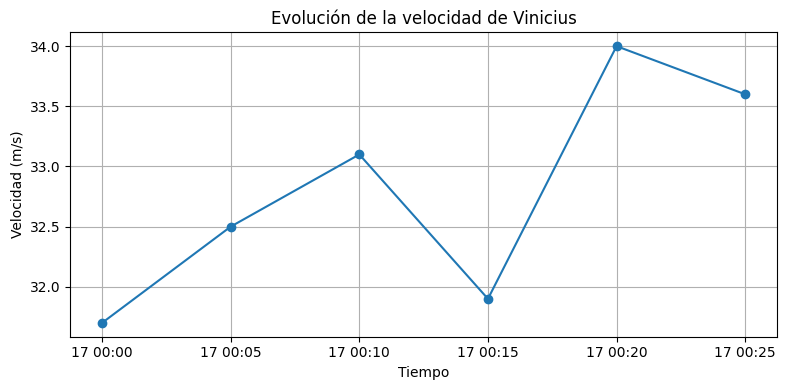

In [ ]:
# Mostrar la evolución de la velocidad ('speed') de 'Vinicius' a lo largo del tiempo
import matplotlib.pyplot as plt

query = """
SELECT time, speed
FROM player_stats
WHERE player = 'Vinicius'
ORDER BY time ASC
"""

df = client.query(query).to_pandas()

plt.figure(figsize=(8, 4))
plt.plot(df["time"], df["speed"], marker="o")
plt.title("Evolución de la velocidad de Vinicius")
plt.xlabel("Tiempo")
plt.ylabel("Velocidad (m/s)")
plt.grid(True)
plt.tight_layout()
plt.show()

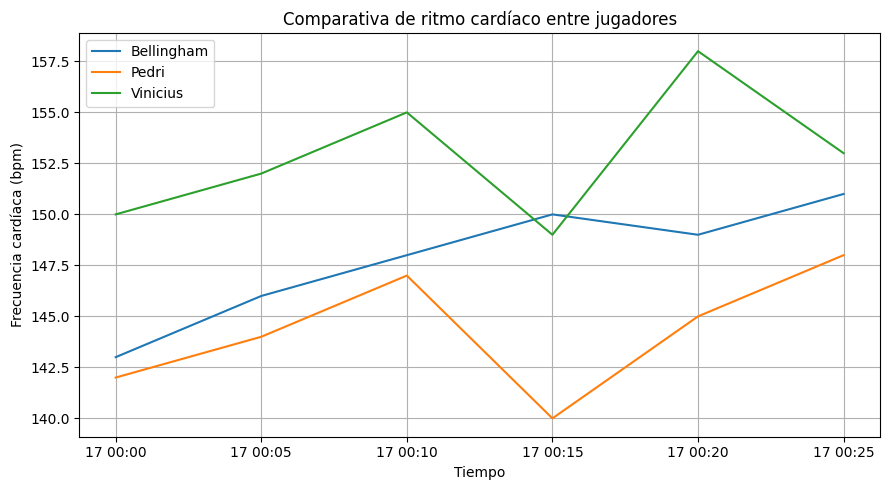

In [ ]:
# Mostrar la comparativa de ritmo cardíaco ('heart_rate') entre 'Vinicius', 'Pedri' y 'Bellingham' a lo largo del tiempo
query = """
SELECT time, player, heart_rate
FROM player_stats
WHERE player IN ('Vinicius', 'Pedri', 'Bellingham')
ORDER BY time ASC
"""

df = client.query(query).to_pandas()

plt.figure(figsize=(9, 5))
for player, subdf in df.groupby("player"):
    plt.plot(subdf["time"], subdf["heart_rate"], label=player)

plt.title("Comparativa de ritmo cardíaco entre jugadores")
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia cardíaca (bpm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

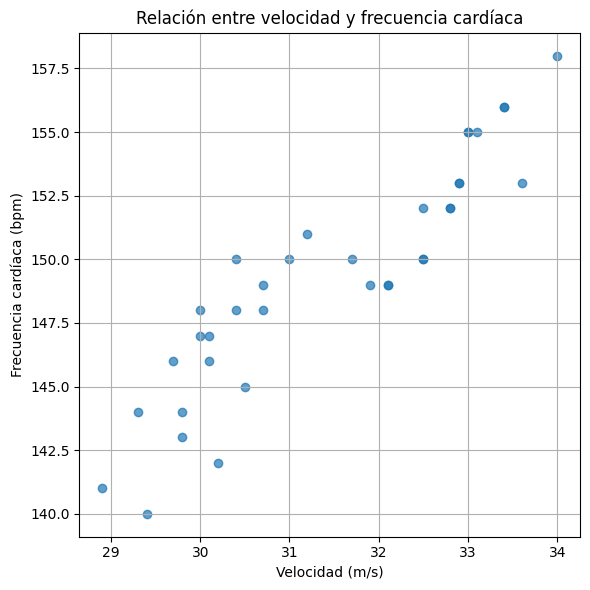

In [ ]:
# Mostrar la relación entre la velocidad ('speed') y el pulso cardíaco ('heart_rate') de todos los jugadores
query = """
SELECT player, speed, heart_rate
FROM player_stats
"""

df = client.query(query).to_pandas()

plt.figure(figsize=(6, 6))
plt.scatter(df["speed"], df["heart_rate"], alpha=0.7)

plt.title("Relación entre velocidad y frecuencia cardíaca")
plt.xlabel("Velocidad (m/s)")
plt.ylabel("Frecuencia cardíaca (bpm)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Cerrar conexión con InfluxDB

In [91]:
client.close()